## **Traveling Salesman Problem Solutions with Ant Colony Optimization and Genetic Algorithms.**

In [2]:
import numpy as np

class AntColony:
    def __init__(self, distances, n_ants, decay, alpha=1, beta=1):
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self, n):
        self.all_inds = range(len(distances))
        self.shortest_path_ = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(n):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.pheromone, self.all_inds, self.distances)

            self.pheromone *= self.decay

            self.shortest_path_ = min(all_paths, key=lambda x: x[1])
            if self.shortest_path_[1] < all_time_shortest_path[1]:
                all_time_shortest_path = self.shortest_path_                
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, pheromone, all_inds, distances):
        pheromone *= self.decay
        for path, dist in all_paths:
            for move in path:
                pheromone[move] += 1.0 / distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path_dist = 0
            path = []
            visited_inds = set()
            visited_inds.add(self.all_inds[i])
            prev = self.all_inds[i]
            for j in range(len(self.distances) - 1):
                move = self.pick_move(self.pheromone[prev], self.distances[prev], visited_inds)
                path_dist += self.distances[prev][move]
                path.append((prev, move))
                prev = move
                visited_inds.add(move)
            all_paths.append((path, path_dist))
        return all_paths
    
    def pick_move(self, pheromone, dist, visited_inds):
        pheromone = np.copy(pheromone)
        pheromone[list(visited_inds)] = 0

        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)

        # Normalize row only if it's not empty
        if row.sum() > 0:
            norm_row = row / row.sum()
            move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        else:
            # If the row is empty, choose a random move
            move = np.random.choice(list(set(self.all_inds) - visited_inds), 1)[0]

        return move


class GeneticAlgorithm:
    def __init__(self, population_size, elite_size, mutation_rate):
        self.population_size = population_size
        self.elite_size = elite_size
        self.mutation_rate = mutation_rate

    def crossover(self, parent1, parent2):
        # Order Crossover (OX1) - a common crossover method for TSP
        start, end = sorted(np.random.choice(len(parent1), 2, replace=False))
        child = [-1] * len(parent1)
        child[start:end] = parent1[start:end]
        remaining = [item for item in parent2 if item not in child]
        index = 0
        for i in range(len(child)):
            if child[i] == -1:
                child[i] = remaining[index]
                index += 1
        return child

    def mutate(self, individual):
        # Swap Mutation - swap two cities in the individual
        mutate_index1, mutate_index2 = np.random.choice(len(individual), 2, replace=False)
        individual[mutate_index1], individual[mutate_index2] = individual[mutate_index2], individual[mutate_index1]
        return individual

    def evolve(self, population):
        elite_size = int(self.elite_size * len(population))
        elites = sorted(population, key=lambda x: x[1])[:elite_size]

        # Crossover
        children = []
        while len(children) < (len(population) - elite_size):
            parent1, parent2 = np.random.choice(elites, 2, replace=False)
            child = self.crossover(parent1[0], parent2[0])
            children.append((child, -1))

        # Mutation
        for i in range(len(children)):
            if np.random.rand() < self.mutation_rate:
                children[i] = (self.mutate(children[i][0]), -1)

        # Combine elites and children
        population = elites + children
        return population

class ACOGA:
    def __init__(self, distances, n_ants, decay, alpha, beta, ga_population_size, ga_elite_size, ga_mutation_rate, generations):
        self.aco = AntColony(distances, n_ants, decay, alpha, beta)
        self.ga = GeneticAlgorithm(ga_population_size, ga_elite_size, ga_mutation_rate)
        self.generations = generations

    def run(self):
        for gen in range(self.generations):
            aco_shortest_path = self.aco.run(1)
            ga_population = self.generate_ga_population(aco_shortest_path)
            ga_population = self.ga.evolve(ga_population)
            best_ga_solution = min(ga_population, key=lambda x: x[1])
            self.aco.pheromone *= self.aco.decay
            self.aco.spread_pheronome([best_ga_solution], self.aco.pheromone, self.aco.all_inds, self.aco.distances)

        return aco_shortest_path

    def generate_ga_population(self, aco_solution):
        # Generate GA population from ACO solution
        ga_population = [(aco_solution[0], -1) for _ in range(self.ga.population_size)]
        return ga_population

# Example usage:
if __name__ == "__main__":
    distances = np.array([[np.inf, 2, 2, 5, 7],
                         [2, np.inf, 4, 8, 2],
                         [2, 4, np.inf, 1, 3],
                         [5, 8, 1, np.inf, 2],
                         [7, 2, 3, 2, np.inf]])

    aco_ga = ACOGA(distances, n_ants=5, decay=0.95, alpha=1, beta=2, ga_population_size=10, ga_elite_size=2, ga_mutation_rate=0.2, generations=20)
    result = aco_ga.run()

    print("ACO-GA Combined Solution:", result)


ACO-GA Combined Solution: ([(0, 2), (2, 3), (3, 4), (4, 1)], 7.0)


In [3]:
import numpy as np
import re

def euclidean_distance(coord1, coord2):
    return np.sqrt((coord2[0] - coord1[0])**2 + (coord2[1] - coord1[1])**2)

def read_coordinates_from_file(file_path):
    coordinates = []
    with open(file_path, 'r') as file:
        for line in file:
            new_line = re.split(r'\s+', line.strip())
            if new_line[0].isdigit():
                id, x, y = new_line[0], float(new_line[1]), float(new_line[2])
                coordinates.append((x, y))
    return coordinates

# Specify the path to your file containing coordinates
file_path = "burma14.tsp"
#file_path = "berlin52.tsp"

# Read coordinates from the file
coordinates = read_coordinates_from_file(file_path)

# Create a distance matrix using NumPy array
num_points = len(coordinates)
distance_matrix = np.zeros((num_points, num_points))

for i in range(num_points):
    for j in range(num_points):
        if i != j:
            distance_matrix[i, j] = euclidean_distance(coordinates[i], coordinates[j])
        else:
            distance_matrix[i, j] = np.inf

# Replace inf values with np.inf
distance_matrix = np.where(np.isinf(distance_matrix), np.inf, distance_matrix)

# Round the values in the distance array to 2 decimal places
distances = np.round(distance_matrix, 2)

print("Distance Matrix:")

# Print column indices
print("      ", end="")
for i in range(num_points):
    print(f"  {i:<6}", end="")
print()

# Print the matrix with row indices
for i in range(num_points):
    print(f"{i:2} |", end="")
    for value in distances[i]:
        print(f"{value:7.2f}", end=" ")
    print()

# Now you can proceed with your ACOGA implementation using the read coordinates.
aco_ga = ACOGA(distances, n_ants=5, decay=0.95, alpha=1, beta=2, ga_population_size=10, ga_elite_size=2, ga_mutation_rate=0.2, generations=20)
result = aco_ga.run()

best_path_indices = result[0]

print("Best Path Indices:", best_path_indices)
print("Best Path length:", np.round(result[1], 2))


Distance Matrix:
        0       1       2       3       4       5       6       7       8       9       10      11      12      13    
 0 |    inf    1.66    5.08    6.52    8.83    5.53    4.10    0.75    1.29    3.15    1.28    5.08    3.12    3.94 
 1 |   1.66     inf    4.09    6.02    9.20    5.76    4.76    1.99    2.94    4.40    2.94    5.18    3.98    3.62 
 2 |   5.08    4.09     inf    2.45    6.96    4.00    4.50    4.73    6.15    8.22    6.01    3.37    4.64    2.01 
 3 |   6.52    6.02    2.45     inf    4.80    2.71    4.12    5.96    7.29    9.60    7.10    2.38    4.80    2.59 
 4 |   8.83    9.20    6.96    4.80     inf    3.44    4.77    8.09    8.93   11.21    8.70    4.06    5.82    5.80 
 5 |   5.53    5.76    4.00    2.71    3.44     inf    1.81    4.81    5.85    8.22    5.63    0.66    2.81    2.43 
 6 |   4.10    4.76    4.50    4.12    4.77    1.81     inf    3.35    4.19    6.51    3.96    1.77    1.07    2.50 
 7 |   0.75    1.99    4.73    5.96    8.09  

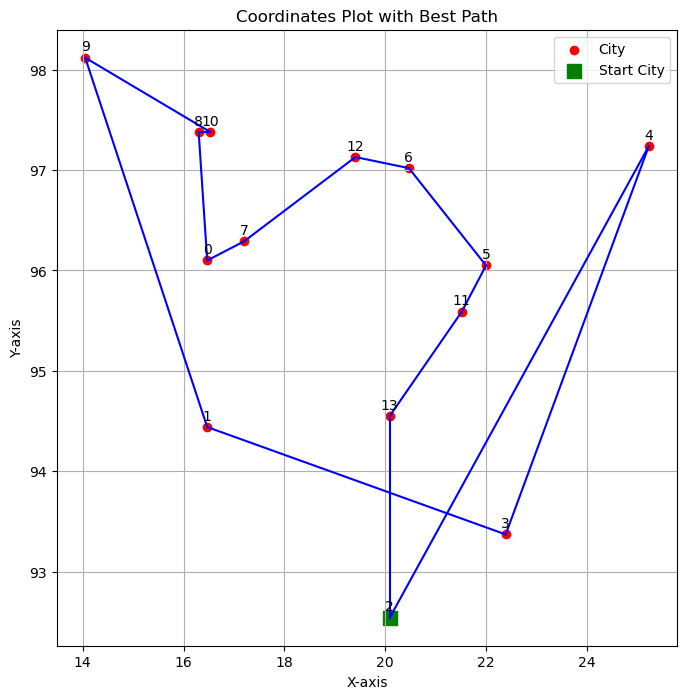

In [4]:
import matplotlib.pyplot as plt

# Extract x and y coordinates from the list of coordinates
x_coords, y_coords = zip(*coordinates)

# Plot the coordinates
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, c='red', marker='o', label='City')

# Annotate each point with its index
for i, (x, y) in enumerate(coordinates):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Connect the points in the order of the best path indices
for start, end in best_path_indices:
    x_start, y_start = coordinates[start]
    x_end, y_end = coordinates[end]
    plt.plot([x_start, x_end], [y_start, y_end], linestyle='-', color='blue')

# Connect back to the starting point
x_start, y_start = coordinates[best_path_indices[-1][1]]
x_end, y_end = coordinates[best_path_indices[0][0]]
plt.plot([x_start, x_end], [y_start, y_end], linestyle='-', color='blue')

# Mark the starting point with a different marker or color
start_index = best_path_indices[0][0]
x_start, y_start = coordinates[start_index]
plt.scatter(x_start, y_start, c='green', marker='s', s=100, label='Start City')

# Show the legend
plt.legend()

# Show the plot
plt.title('Coordinates Plot with Best Path')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


In [5]:
# Initialize ACOGA parameters

import time

n_ants = 5
decay = 0.95
alpha = 1
beta = 2
ga_population_size = 20
ga_elite_size = 2
ga_mutation_rate = 0.2
generations = 130

# Initialize ACOGA instance
aco_ga = ACOGA(distances, n_ants=n_ants, decay=decay, alpha=alpha, beta=beta,
               ga_population_size=ga_population_size, ga_elite_size=ga_elite_size,
               ga_mutation_rate=ga_mutation_rate, generations=generations)

# Measure execution time
start_time = time.time()

# Run ACOGA
result = aco_ga.run()

# Measure execution time
execution_time = time.time() - start_time
print("Execution Time:", execution_time, "seconds")

# Extract result data
best_path_indices = result[0]
best_path_length = np.round(result[1], 2)

# Print results
print("Best Path Indices:", best_path_indices)
print("Best Path Length:", best_path_length)

Execution Time: 0.3269627094268799 seconds
Best Path Indices: [(4, 3), (3, 2), (2, 13), (13, 11), (11, 5), (5, 6), (6, 12), (12, 7), (7, 0), (0, 10), (10, 8), (8, 9), (9, 1)]
Best Path Length: 25.96


Generations: 10, Execution Time: 0.0278 seconds
Best Path Indices: [(1, 0), (0, 7), (7, 10), (10, 8), (8, 9), (9, 12), (12, 6), (6, 11), (11, 5), (5, 13), (13, 2), (2, 3), (3, 4)]
Best Path Length: 26.93
Generations: 60, Execution Time: 0.1438 seconds
Best Path Indices: [(1, 7), (7, 0), (0, 8), (8, 10), (10, 9), (9, 12), (12, 6), (6, 5), (5, 11), (11, 13), (13, 2), (2, 3), (3, 4)]
Best Path Length: 26.87
Generations: 110, Execution Time: 0.2806 seconds
Best Path Indices: [(4, 5), (5, 11), (11, 6), (6, 12), (12, 7), (7, 0), (0, 10), (10, 8), (8, 9), (9, 1), (1, 13), (13, 2), (2, 3)]
Best Path Length: 26.41
Generations: 160, Execution Time: 0.4112 seconds
Best Path Indices: [(1, 0), (0, 7), (7, 10), (10, 8), (8, 9), (9, 12), (12, 6), (6, 5), (5, 11), (11, 13), (13, 2), (2, 3), (3, 4)]
Best Path Length: 26.31
Generations: 210, Execution Time: 0.5667 seconds
Best Path Indices: [(1, 0), (0, 7), (7, 8), (8, 10), (10, 9), (9, 6), (6, 12), (12, 13), (13, 2), (2, 3), (3, 5), (5, 11), (11, 4)]
B

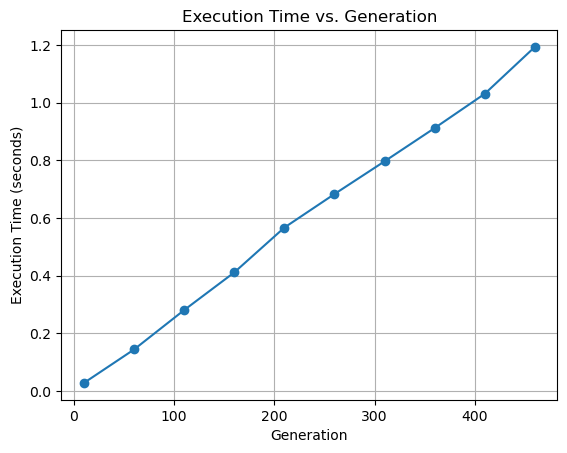

In [6]:
# Lists to store data for plotting
generations_list = []
execution_times_list = []

# Run ACOGA for multiple generations
for generations in range(10, 501, 50):
    # Initialize ACOGA instance
    aco_ga = ACOGA(distances, n_ants=n_ants, decay=decay, alpha=alpha, beta=beta,
                   ga_population_size=ga_population_size, ga_elite_size=ga_elite_size,
                   ga_mutation_rate=ga_mutation_rate, generations=generations)

    # Measure execution time
    start_time = time.time()

    # Run ACOGA
    result = aco_ga.run()

    # Measure execution time
    execution_time = time.time() - start_time
    print(f"Generations: {generations}, Execution Time: {execution_time:.4f} seconds")

    # Store data for plotting
    generations_list.append(generations)
    execution_times_list.append(execution_time)

    # Extract result data
    best_path_indices = result[0]
    best_path_length = np.round(result[1], 2)

    # Print results
    print("Best Path Indices:", best_path_indices)
    print("Best Path Length:", best_path_length)

# Plot time vs. generation
plt.plot(generations_list, execution_times_list, marker='o')
plt.title('Execution Time vs. Generation')
plt.xlabel('Generation')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

Generations: 10, Execution Time: 0.0184 seconds
Best Path Indices: [(4, 6), (6, 12), (12, 11), (11, 5), (5, 3), (3, 2), (2, 13), (13, 8), (8, 10), (10, 0), (0, 7), (7, 1), (1, 9)]
Best Path Length: 29.66
Generations: 60, Execution Time: 0.1606 seconds
Best Path Indices: [(1, 0), (0, 7), (7, 10), (10, 8), (8, 9), (9, 12), (12, 6), (6, 5), (5, 11), (11, 3), (3, 2), (2, 13), (13, 4)]
Best Path Length: 27.92
Generations: 110, Execution Time: 0.2859 seconds
Best Path Indices: [(1, 0), (0, 7), (7, 10), (10, 8), (8, 9), (9, 12), (12, 6), (6, 5), (5, 11), (11, 13), (13, 2), (2, 3), (3, 4)]
Best Path Length: 26.31
Generations: 160, Execution Time: 0.4040 seconds
Best Path Indices: [(4, 3), (3, 2), (2, 13), (13, 11), (11, 5), (5, 6), (6, 12), (12, 7), (7, 0), (0, 10), (10, 8), (8, 9), (9, 1)]
Best Path Length: 25.96
Generations: 210, Execution Time: 0.5809 seconds
Best Path Indices: [(1, 0), (0, 7), (7, 10), (10, 8), (8, 9), (9, 12), (12, 6), (6, 5), (5, 11), (11, 3), (3, 2), (2, 13), (13, 4)]
B

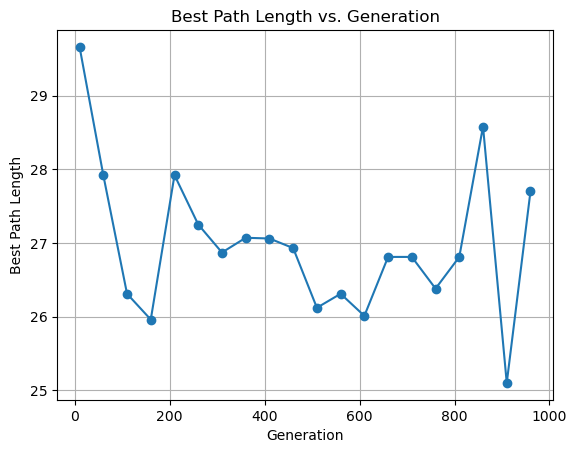

In [8]:
# Lists to store data for plotting
generations_list = []
execution_times_list = []
best_path_lengths_list = []

# Run ACOGA for multiple generations
for generations in range(10, 1000, 50):
    # Initialize ACOGA instance
    aco_ga = ACOGA(distances, n_ants=n_ants, decay=decay, alpha=alpha, beta=beta,
                   ga_population_size=ga_population_size, ga_elite_size=ga_elite_size,
                   ga_mutation_rate=ga_mutation_rate, generations=generations)

    # Measure execution time
    start_time = time.time()

    # Run ACOGA
    result = aco_ga.run()

    # Measure execution time
    execution_time = time.time() - start_time
    print(f"Generations: {generations}, Execution Time: {execution_time:.4f} seconds")

    # Store data for plotting
    generations_list.append(generations)
    execution_times_list.append(execution_time)
    best_path_lengths_list.append(result[1])  # Appending the best path length

    # Extract result data
    best_path_indices = result[0]
    best_path_length = np.round(result[1], 2)

    # Print results
    print("Best Path Indices:", best_path_indices)
    print("Best Path Length:", best_path_length)

# Plot best path length vs. generation
plt.plot(generations_list, best_path_lengths_list, marker='o')
plt.title('Best Path Length vs. Generation')
plt.xlabel('Generation')
plt.ylabel('Best Path Length')
plt.grid(True)
plt.show()


Generations: 10, Execution Time: 0.0228 seconds
Best Path Indices: [(2, 13), (13, 5), (5, 11), (11, 6), (6, 12), (12, 7), (7, 0), (0, 10), (10, 8), (8, 9), (9, 1), (1, 3), (3, 4)]
Best Path Length: 30.15
Average Path Length: 2.319230769230769
Max Path Length: 6.02
Generations: 30, Execution Time: 0.0864 seconds
Best Path Indices: [(1, 0), (0, 7), (7, 8), (8, 10), (10, 9), (9, 12), (12, 6), (6, 11), (11, 5), (5, 13), (13, 2), (2, 3), (3, 4)]
Best Path Length: 27.28
Average Path Length: 2.0984615384615384
Max Path Length: 5.45
Generations: 50, Execution Time: 0.1266 seconds
Best Path Indices: [(1, 0), (0, 7), (7, 10), (10, 8), (8, 9), (9, 12), (12, 6), (6, 11), (11, 5), (5, 13), (13, 2), (2, 3), (3, 4)]
Best Path Length: 26.93
Average Path Length: 2.0715384615384616
Max Path Length: 5.45
Generations: 70, Execution Time: 0.1828 seconds
Best Path Indices: [(1, 0), (0, 7), (7, 8), (8, 10), (10, 9), (9, 12), (12, 6), (6, 5), (5, 11), (11, 13), (13, 2), (2, 3), (3, 4)]
Best Path Length: 26.66

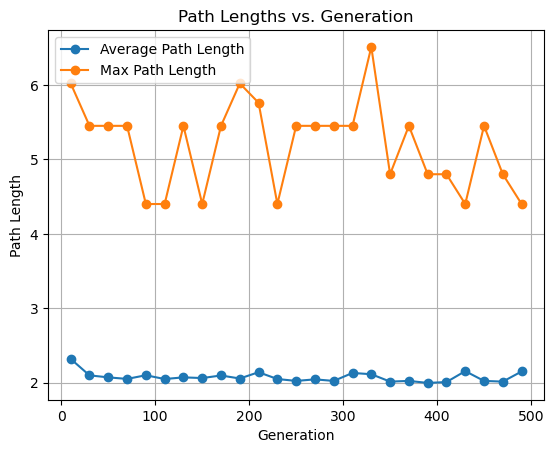

In [9]:
# Lists to store data for plotting
generations_list = []
execution_times_list = []
average_path_lengths_list = []
max_path_lengths_list = []

# Run ACOGA for multiple generations
for generations in range(10, 501, 20):
    # Initialize ACOGA instance
    aco_ga = ACOGA(distances, n_ants=n_ants, decay=decay, alpha=alpha, beta=beta,
                   ga_population_size=ga_population_size, ga_elite_size=ga_elite_size,
                   ga_mutation_rate=ga_mutation_rate, generations=generations)

    # Measure execution time
    start_time = time.time()

    # Run ACOGA
    result = aco_ga.run()

    # Measure execution time
    execution_time = time.time() - start_time
    print(f"Generations: {generations}, Execution Time: {execution_time:.4f} seconds")

    # Store data for plotting
    generations_list.append(generations)
    execution_times_list.append(execution_time)

    # Extract result data
    best_path_indices = result[0]
    best_path_length = np.round(result[1], 2)

    # Calculate average and max path lengths
    average_path_length = np.mean([distances[i, j] for i, j in best_path_indices])
    max_path_length = np.max([distances[i, j] for i, j in best_path_indices])

    average_path_lengths_list.append(average_path_length)
    max_path_lengths_list.append(max_path_length)

    # Print results
    print("Best Path Indices:", best_path_indices)
    print("Best Path Length:", best_path_length)
    print("Average Path Length:", average_path_length)
    print("Max Path Length:", max_path_length)

# Plot average path length vs. generation
plt.plot(generations_list, average_path_lengths_list, label='Average Path Length', marker='o')

# Plot max path length vs. generation
plt.plot(generations_list, max_path_lengths_list, label='Max Path Length', marker='o')

plt.title('Path Lengths vs. Generation')
plt.xlabel('Generation')
plt.ylabel('Path Length')
plt.legend()
plt.grid(True)
plt.show()


Generations: 50, Execution Time: 0.1158 seconds
Best Path Indices: [(4, 3), (3, 2), (2, 13), (13, 11), (11, 5), (5, 12), (12, 6), (6, 1), (1, 0), (0, 7), (7, 10), (10, 8), (8, 9)]
Best Path Length: 26.62


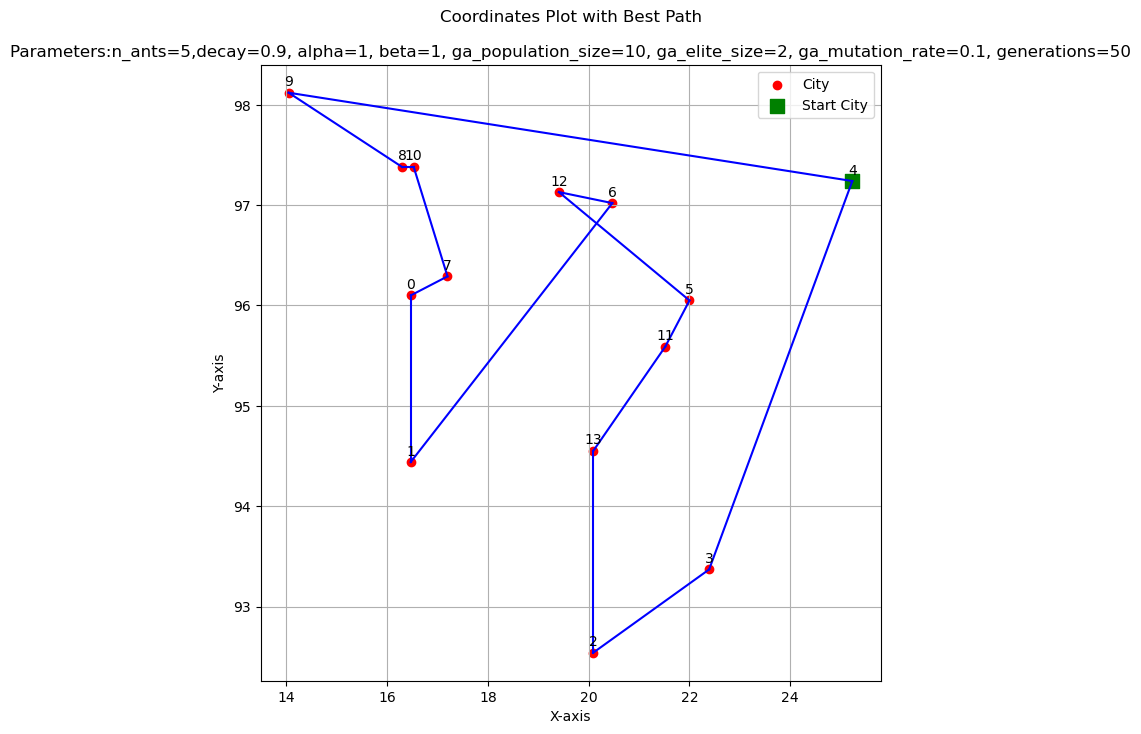

Generations: 100, Execution Time: 0.3794 seconds
Best Path Indices: [(4, 11), (11, 5), (5, 13), (13, 6), (6, 12), (12, 7), (7, 0), (0, 8), (8, 10), (10, 9), (9, 1), (1, 2), (2, 3)]
Best Path Length: 28.88


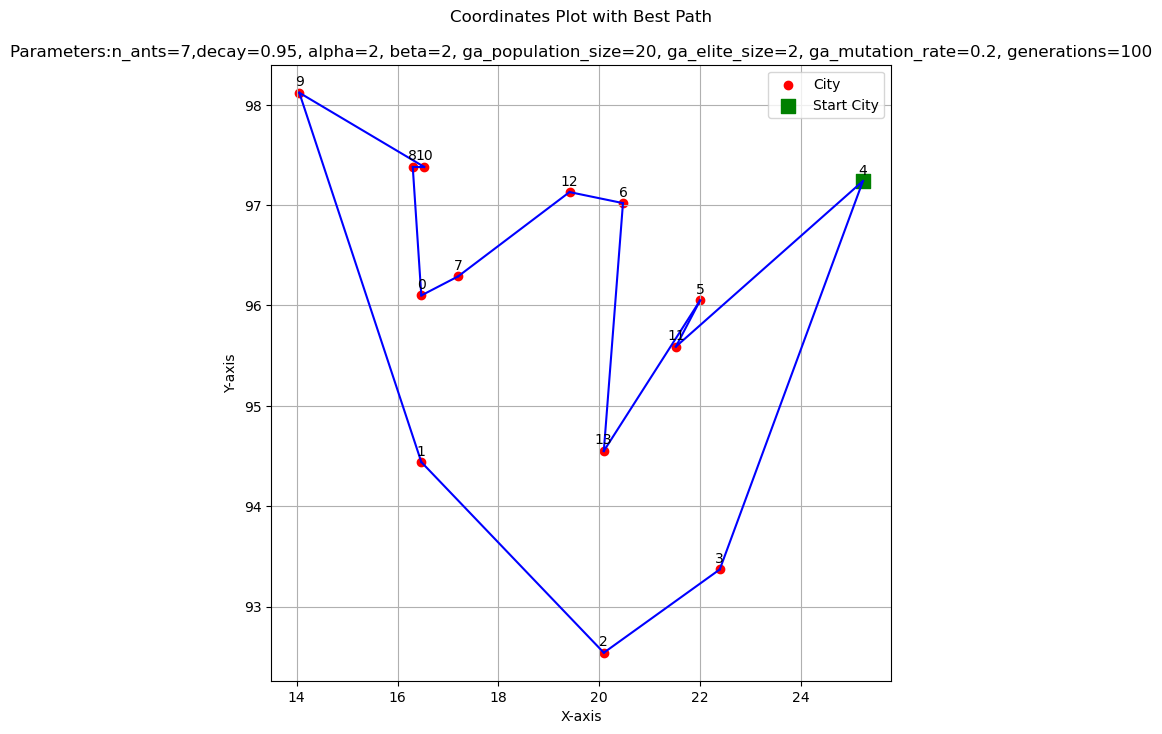

Generations: 150, Execution Time: 0.8398 seconds
Best Path Indices: [(1, 0), (0, 7), (7, 10), (10, 8), (8, 9), (9, 12), (12, 6), (6, 5), (5, 11), (11, 13), (13, 2), (2, 3), (3, 4)]
Best Path Length: 26.31


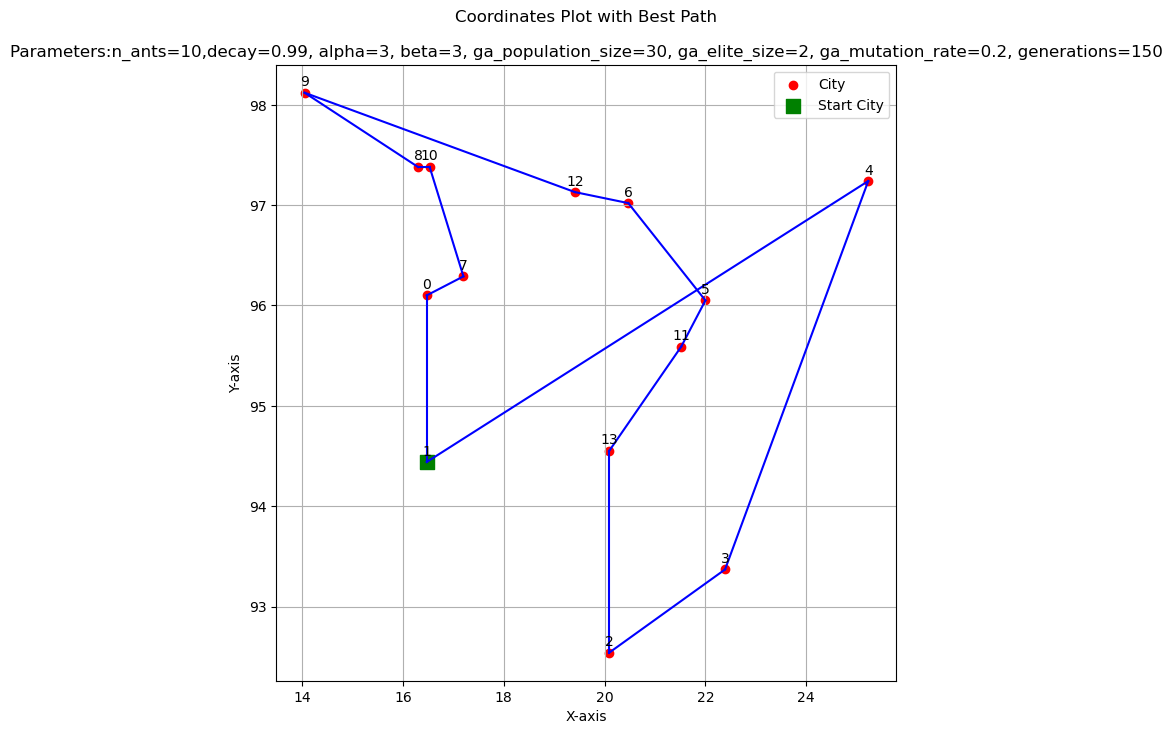

In [10]:
# Lists to store data for plotting
generations_list = []
execution_times_list = []
best_path_lengths_list = []

# Various Parameter combination to achieve best solution
parameter_combinations = [
    (5, 0.9, 1, 1, 10, 2, 0.1, 50),
    (7, 0.95, 2, 2, 20, 2, 0.2, 100),
    (10, 0.99, 3, 3, 30, 2, 0.2, 150),
]

for params in parameter_combinations:
    n_ants, decay, alpha, beta, ga_population_size, ga_elite_size, ga_mutation_rate, generations = params
    aco_ga = ACOGA(distances, n_ants=n_ants, decay=decay, alpha=alpha, beta=beta,
                   ga_population_size=ga_population_size, ga_elite_size=ga_elite_size,
                   ga_mutation_rate=ga_mutation_rate, generations=generations)
    
    # Measure execution time
    start_time = time.time()

    # Run ACOGA
    result = aco_ga.run()

    # Measure execution time
    execution_time = time.time() - start_time
    print(f"Generations: {generations}, Execution Time: {execution_time:.4f} seconds")

    # Store data for plotting
    generations_list.append(generations)
    execution_times_list.append(execution_time)
    best_path_lengths_list.append(result[1])  # Appending the best path length

    # Extract result data
    best_path_indices = result[0]
    best_path_length = np.round(result[1], 2)

    # Print results
    print("Best Path Indices:", best_path_indices)
    print("Best Path Length:", best_path_length)
    
    # Extract x and y coordinates from the list of coordinates
    x_coords, y_coords = zip(*coordinates)

    # Plot the coordinates
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, c='red', marker='o', label='City')

    # Annotate each point with its index
    for i, (x, y) in enumerate(coordinates):
        plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

    # Connect the points in the order of the best path indices
    for start, end in best_path_indices:
        x_start, y_start = coordinates[start]
        x_end, y_end = coordinates[end]
        plt.plot([x_start, x_end], [y_start, y_end], linestyle='-', color='blue')

    # Connect back to the starting point
    x_start, y_start = coordinates[best_path_indices[-1][1]]
    x_end, y_end = coordinates[best_path_indices[0][0]]
    plt.plot([x_start, x_end], [y_start, y_end], linestyle='-', color='blue')

    # Mark the starting point with a different marker or color
    start_index = best_path_indices[0][0]
    x_start, y_start = coordinates[start_index]
    plt.scatter(x_start, y_start, c='green', marker='s', s=100, label='Start City')

    # Show the legend
    plt.legend()

    # Show the plot
    #plt.title('Coordinates Plot with Best Path')
    plt.title(f'Coordinates Plot with Best Path\n\nParameters:n_ants={n_ants},decay={decay}, alpha={alpha}, beta={beta}, ga_population_size={ga_population_size}, ga_elite_size={ga_elite_size}, ga_mutation_rate={ga_mutation_rate}, generations={generations}')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()